<a href="https://colab.research.google.com/github/Ahmadfikriand/R-and-Python-Code/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

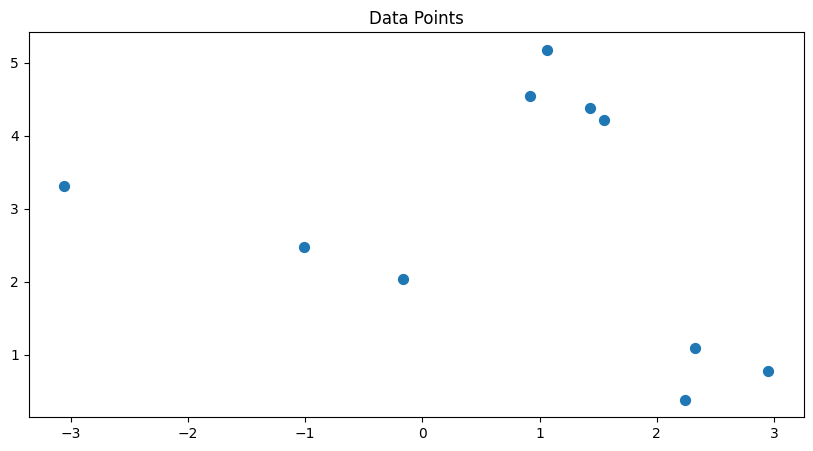

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

n_clusters=3
n_samples=10
epochs=5
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.60, random_state=0)
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:,1], s=50)
plt.title("Data Points")
plt.show()

**a. Inisialisasi: Pilih nilai awal pusat cluster secara acak**

In [2]:
# --- Initializing Centroids as Random Points from Data ---
init_centroids = np.random.choice(range(n_samples), size=n_clusters, replace=False)

centroid_dict = {}
for i, c in zip(range(n_clusters), init_centroids):
  centroid_dict[i] = X[c]

cluster_dict = {}
for i in range(n_clusters):
  cluster_dict[i] = []

centroid_dict

{0: array([0.91433877, 4.55014643]),
 1: array([-3.0586979 ,  3.31005342]),
 2: array([1.43289271, 4.37679234])}

In [3]:
df = pd.read_excel('clustering_dataset.xlsx')
df.head()

,Pembeli,x1,x2
0,1,80,4
1,2,150,6
2,3,50,2
3,4,200,8
4,5,120,5


In [4]:
df.columns

Index(['Pembeli', 'x1', 'x2'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pembeli  10 non-null     int64 
 1   x1       10 non-null     object
 2   x2       10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df['x1'] = df['x1'].astype(str).astype(int)

In [7]:
df.describe()

,Pembeli,x1,x2
count,10.00000,10.000000,10.000000
mean,5.50000,107.500000,4.500000
std,3.02765,50.840163,2.173067
min,1.00000,40.000000,1.000000
25%,3.25000,76.250000,3.250000
50%,5.50000,100.000000,4.500000
75%,7.75000,142.500000,5.750000
max,10.00000,200.000000,8.000000


In [8]:
df.isnull().sum()

Pembeli    0
x1         0
x2         0
dtype: int64

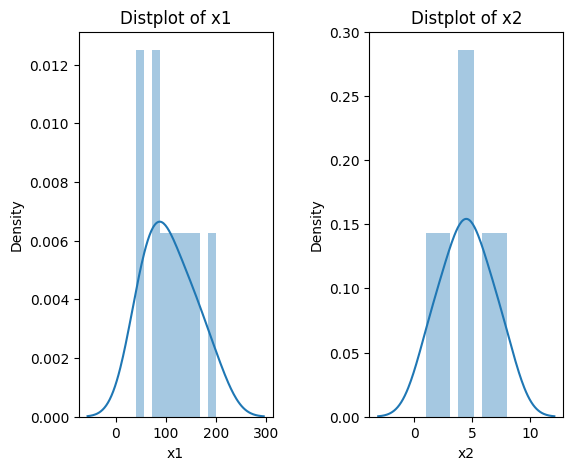

In [9]:
plt.figure(1, figsize= (10,5))
n = 0
for x in ['x1','x2']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace = 0.5)
    sns.distplot(df[x],bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

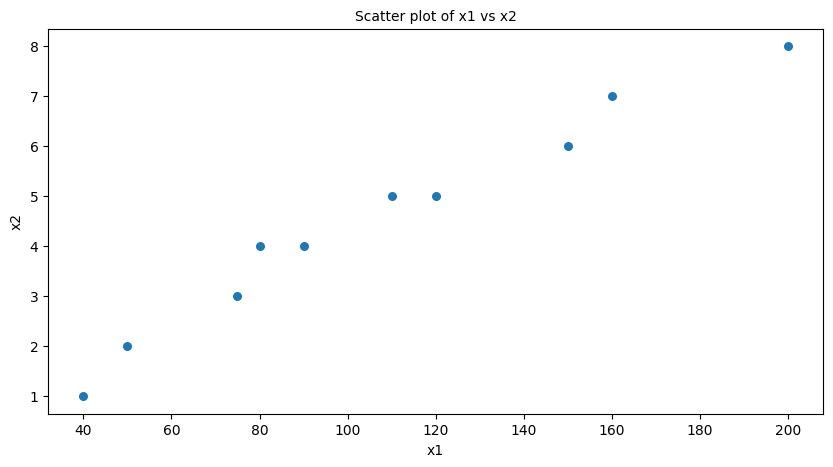

In [10]:
plt.figure(1, figsize=(10,5))
plt.title('Scatter plot of x1 vs x2', fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter( x='x1', y='x2', data=df, s=30)
plt.show()

In [11]:
X = df[['x1','x2']].iloc[:,:].values
inertia = []
for n in range(1,10):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

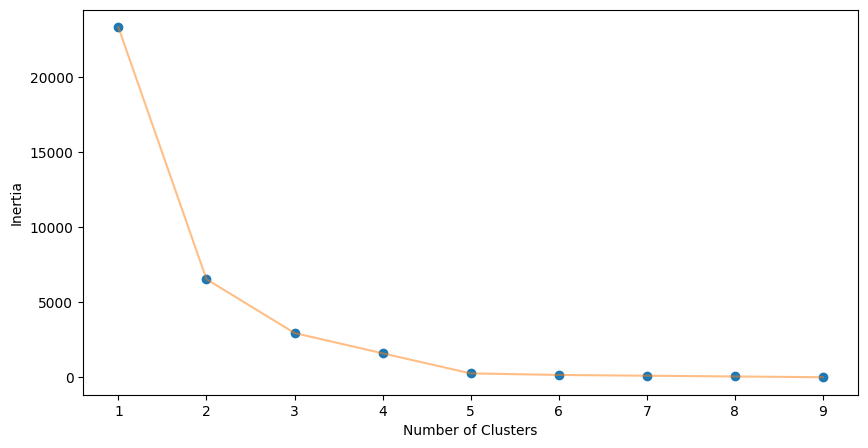

In [12]:
plt.figure(1, figsize=(10,5))
plt.plot(np.arange(1,10), inertia, 'o')
plt.plot(np.arange(1,10), inertia, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

**b. Tentukan anggota setiap cluster berdasarkan kemiripan anggotanya, yaitu jarak terdekat pembeli ke pusat cluster. Hitunglah nilai fungsi objektif.**

In [13]:
kmeans = KMeans(n_clusters=3).fit(X)

cluster_centers = [X[kmeans.labels_ == i].mean(axis=0) for i in range(3)]

clusterwise_sse = [0, 0, 0]
for point, label in zip(X, kmeans.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()

clusterwise_sse

[1502.7999999999997, 1402.0, 50.5]

**c. Hitunglah pusat-pusat cluster baru berdasarkan rata-rata dari setiap atribut dari anggota cluster.**

In [14]:
algorithm = (KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,
                        tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [15]:
h = 0.02
x_min, x_max = X[:,0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:,1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

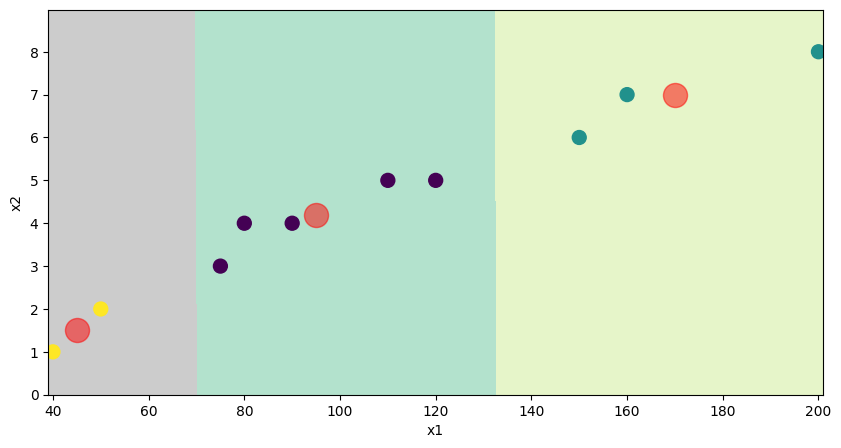

In [16]:
plt.figure(1,figsize=(10,5))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'x1', y = 'x2', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[:,0] , y =  centroids1[:,1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('x2') , plt.xlabel('x1')
plt.show()

**d. Ulangi langkah (b) dan (c) sampai pusat cluster tidak berubah secara signifikan atau jumlah iterasi yang ditentukan tercapai (cukup 5 epoch saja).**

In [17]:
X2 = df[['x1' , 'x2']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

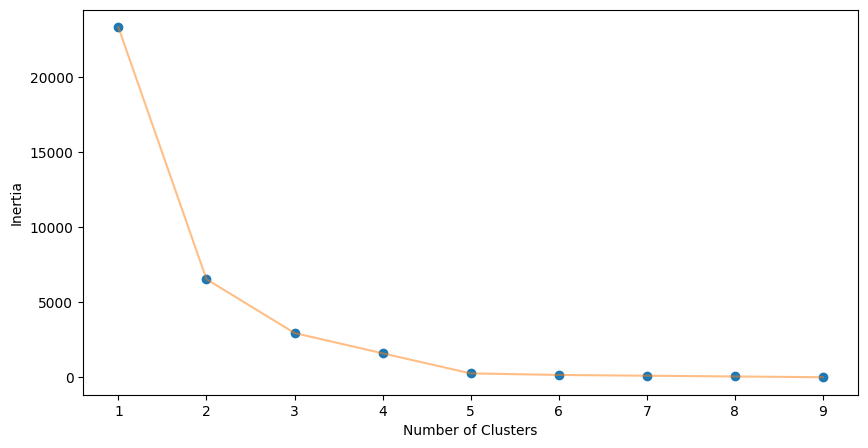

In [18]:
plt.figure(1,figsize = (10,5))
plt.plot(np.arange(1,10) , inertia , 'o')
plt.plot(np.arange(1,10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [19]:
algorithm = (KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,
                        tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [20]:
h = 0.02
x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

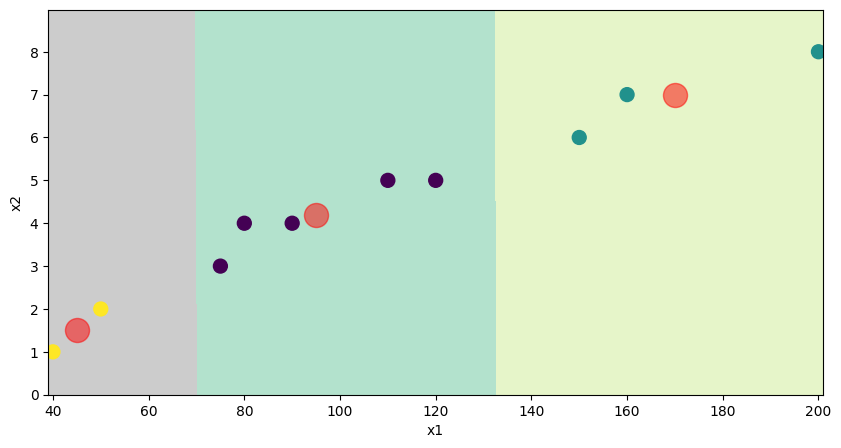

In [21]:
plt.figure(1, figsize=(10,5))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='x1', y='x2', data=df, c=labels2, s=100)
plt.scatter(x=centroids2[:,0], y=centroids2[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('x2'), plt.xlabel('x1')
plt.show()

In [22]:
X3 = df[['Pembeli','x1','x2']].iloc[:,:].values
inertia = []
for n in range(1,10):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                        tol=0.0001, random_state=111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

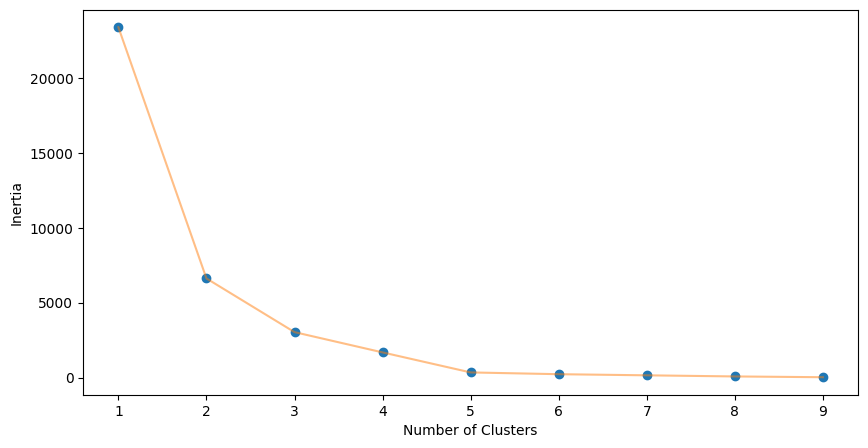

In [23]:
plt.figure(1, figsize=(10 ,5))
plt.plot(np.arange(1,10), inertia, 'o')
plt.plot(np.arange(1,10), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

**e. Setelah pelatihan selesai tulislah: anggota masing-masing cluster,pusat-pusat cluster, dan hitunglah Rank Index. Plot data pembeli dan garis pemisah cluster pada grafik.**

In [24]:
algorithm = (KMeans(n_clusters=3, init='k-means++', n_init=10 ,max_iter=300,
                        tol=0.0001, random_state=111, algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df

,Pembeli,x1,x2,cluster
0,1,80,4,0
1,2,150,6,1
2,3,50,2,2
3,4,200,8,1
4,5,120,5,0
5,6,75,3,0
6,7,110,5,0
7,8,90,4,0
8,9,160,7,1
9,10,40,1,2


In [25]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Pembeli'],
    y= df['x1'],
    z= df['x2'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters Pembeli, x1 and x2',
    scene = dict(
            xaxis = dict(title  = 'Pembeli'),
            yaxis = dict(title  = 'x1'),
            zaxis = dict(title  = 'x2')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [26]:
def pembeli(num):
    return chr(((num-1) % 26) + ord('a'))

In [27]:
df['Pembeli']=df['Pembeli'].apply(pembeli)
df

,Pembeli,x1,x2,cluster
0,a,80,4,0
1,b,150,6,1
2,c,50,2,2
3,d,200,8,1
4,e,120,5,0
5,f,75,3,0
6,g,110,5,0
7,h,90,4,0
8,i,160,7,1
9,j,40,1,2


**f. Dari hasil clustering (e) berikan analisa anda.**

Ada 3 tiga cluster dari hasil modelling tersebut. Cluster 0 terdiri dari 5 pembeli, cluster 1 terdiri dari 3 pembeli dan cluster 2 terdiri dari 2 pembeli. Jadi, cluster yang memiliki banyak pembeli adalah cluster 0.

Jika dilihat polanya cluster 0 memiliki range x1 dari 80-120, cluster 1 memiliki range x1 dari 150-200 dan cluster 2 memiliki range x1 dari 40-50.

Jika dilihat polanya cluster 0 memiliki range x2 dari 3-5, cluster 1 memiliki range x1 dari 6-8 dan cluster 2 memiliki range x2 dari 1-2.

Mungkin dari data ini, bisa didefinisikan x1 sebagai harga barang dan x2 sebagai jumlah barang yang dibeli.